In [1]:
import matplotlib

import matplotlib.pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format='retina'



from importlib import reload

import numpy as np



from astropy.cosmology import FlatLambdaCDM

from astropy import units as u

from astropy.constants import c



from scipy.interpolate import UnivariateSpline

from scipy.interpolate import interpolate



from trgpy.config import cosmo_params

import trgpy.sed

reload(trgpy.sed)

from trgpy.sed import obs_to_restframe_sed, get_lum_from_sed, get_flux_from_sed, get_mBB_thick_radio


In [3]:
params = {'backend': 'ps',

'legend.fontsize': 18,

'xtick.labelsize': 29,

'ytick.labelsize': 29,

'font.family': 'serif',

'text.usetex': True,

'legend.numpoints': 1

}



matplotlib.rcParams.update(params)

In [100]:
#@title Generate SED Fluxes { form-width: "20%" }



# Which wavelengths should be sampled?

lmd_o = np.array([250.,350.,450.,500.,850.,1100.]) # Wavelenghts [um]

# Generate SED model

Td = [30.,40.,50.] #dust temperature [K]

B = [1.,1.5,2.]# Beta value/slope 

SFR = 350. # should be fixed - this might be an ok value. [M_sun/yr]

z = [1.,2.5,3.5,4.5,6.] # here we need an array

save_name=[None]*np.size(Td)*np.size(B)*np.size(SFR)*np.size(z)
g=0

for k in range(0,len(Td)):
    for q in range(0,len(B)):
        for w in range(0,len(z)):
            frq_o, frq_r, flux_radio, flux_mm, flux = get_mBB_thick_radio(z=z[w], SFR=SFR, Td=Td[k], beta=B[q]) # Can probably discard this line
    
            # Get fluxes at sampled wavelengths
            flux_lmd_o = get_flux_from_sed(frq_o, flux, (1.E-9*3.E8/(lmd_o*1.E-6))*u.GHz)
            flux_lmd_o = flux_lmd_o*1.E3 # [mJy]
    
            #Get rms noise and flux uncertainty
            rms_noise = flux_lmd_o*0.15 #scale of the noise is the same as the error. 15% of true value 
            eflux_lmd_o = rms_noise # Uncertainty
    
            for i in np.arange(0,len(flux_lmd_o)):
                # My attempt at adding noise
                flux_lmd_o[i] = np.random.normal(loc=flux_lmd_o[i], scale=rms_noise[i], size=None)
        

            # Save fluxes to file
            import os.path
            path = "C:/Users/blue/Desktop/Python/SynthSED"
            #file name gives info about SED
            name_of_file = "Td="+str(Td[k])+","+"Beta="+str(B[q])+","+"SFR="+str(SFR)+","+"z="+str(z[w])
            print(name_of_file)
            save_name[g]=name_of_file
            g=g+1
            completeName = os.path.join(path, name_of_file+".txt")
            
            f = open(completeName, "w")
            #file is structures as wavelength
            for i in np.arange(0,len(lmd_o)):
                out = str(lmd_o[i]) + " " + str(flux_lmd_o[i]) + " " + str(eflux_lmd_o[i]) + "\n"
                f.write(out)
        
            f.close()

Td=30.0,Beta=1.0,SFR=350.0,z=1.0
Td=30.0,Beta=1.0,SFR=350.0,z=2.5
Td=30.0,Beta=1.0,SFR=350.0,z=3.5
Td=30.0,Beta=1.0,SFR=350.0,z=4.5
Td=30.0,Beta=1.0,SFR=350.0,z=6.0
Td=30.0,Beta=1.5,SFR=350.0,z=1.0
Td=30.0,Beta=1.5,SFR=350.0,z=2.5
Td=30.0,Beta=1.5,SFR=350.0,z=3.5
Td=30.0,Beta=1.5,SFR=350.0,z=4.5
Td=30.0,Beta=1.5,SFR=350.0,z=6.0
Td=30.0,Beta=2.0,SFR=350.0,z=1.0
Td=30.0,Beta=2.0,SFR=350.0,z=2.5
Td=30.0,Beta=2.0,SFR=350.0,z=3.5
Td=30.0,Beta=2.0,SFR=350.0,z=4.5
Td=30.0,Beta=2.0,SFR=350.0,z=6.0
Td=40.0,Beta=1.0,SFR=350.0,z=1.0
Td=40.0,Beta=1.0,SFR=350.0,z=2.5
Td=40.0,Beta=1.0,SFR=350.0,z=3.5
Td=40.0,Beta=1.0,SFR=350.0,z=4.5
Td=40.0,Beta=1.0,SFR=350.0,z=6.0
Td=40.0,Beta=1.5,SFR=350.0,z=1.0
Td=40.0,Beta=1.5,SFR=350.0,z=2.5
Td=40.0,Beta=1.5,SFR=350.0,z=3.5
Td=40.0,Beta=1.5,SFR=350.0,z=4.5
Td=40.0,Beta=1.5,SFR=350.0,z=6.0
Td=40.0,Beta=2.0,SFR=350.0,z=1.0
Td=40.0,Beta=2.0,SFR=350.0,z=2.5
Td=40.0,Beta=2.0,SFR=350.0,z=3.5
Td=40.0,Beta=2.0,SFR=350.0,z=4.5
Td=40.0,Beta=2.0,SFR=350.0,z=6.0
Td=50.0,Be

In [101]:
save_name

['Td=30.0,Beta=1.0,SFR=350.0,z=1.0',
 'Td=30.0,Beta=1.0,SFR=350.0,z=2.5',
 'Td=30.0,Beta=1.0,SFR=350.0,z=3.5',
 'Td=30.0,Beta=1.0,SFR=350.0,z=4.5',
 'Td=30.0,Beta=1.0,SFR=350.0,z=6.0',
 'Td=30.0,Beta=1.5,SFR=350.0,z=1.0',
 'Td=30.0,Beta=1.5,SFR=350.0,z=2.5',
 'Td=30.0,Beta=1.5,SFR=350.0,z=3.5',
 'Td=30.0,Beta=1.5,SFR=350.0,z=4.5',
 'Td=30.0,Beta=1.5,SFR=350.0,z=6.0',
 'Td=30.0,Beta=2.0,SFR=350.0,z=1.0',
 'Td=30.0,Beta=2.0,SFR=350.0,z=2.5',
 'Td=30.0,Beta=2.0,SFR=350.0,z=3.5',
 'Td=30.0,Beta=2.0,SFR=350.0,z=4.5',
 'Td=30.0,Beta=2.0,SFR=350.0,z=6.0',
 'Td=40.0,Beta=1.0,SFR=350.0,z=1.0',
 'Td=40.0,Beta=1.0,SFR=350.0,z=2.5',
 'Td=40.0,Beta=1.0,SFR=350.0,z=3.5',
 'Td=40.0,Beta=1.0,SFR=350.0,z=4.5',
 'Td=40.0,Beta=1.0,SFR=350.0,z=6.0',
 'Td=40.0,Beta=1.5,SFR=350.0,z=1.0',
 'Td=40.0,Beta=1.5,SFR=350.0,z=2.5',
 'Td=40.0,Beta=1.5,SFR=350.0,z=3.5',
 'Td=40.0,Beta=1.5,SFR=350.0,z=4.5',
 'Td=40.0,Beta=1.5,SFR=350.0,z=6.0',
 'Td=40.0,Beta=2.0,SFR=350.0,z=1.0',
 'Td=40.0,Beta=2.0,SFR=350.0,z=2.5',
 

In [141]:
for x in save_name:
    if 'Td=30.0,Beta=1.0' in x:
        #idx[x]=save_name.index(x)
        print(save_name.index(x))

0
1
2
3
4


In [111]:
#Plot figures and save them as .png 
f = open(os.path.join(path,save_name[0]+".txt"), "r")
data=f.read().split()
for i in range(0,len(data)):
    data[i]=float(data[i])
#print(data)
data=np.reshape(data,(int(len(data)/3),3))
data[i]=data
print(data)

[[  250.          6593.84738319   855.85330834]
 [  350.          8303.61451696  1173.4674292 ]
 [  450.          8993.82683396  1388.41041968]
 [  500.          7264.27120265  1470.88024341]
 [  850.         12369.27774679  1812.28860449]
 [ 1100.         14660.38431296  1936.10518575]]


In [128]:
a=[data,data]
a[1]

array([[  250.        ,  6593.84738319,   855.85330834],
       [  350.        ,  8303.61451696,  1173.4674292 ],
       [  450.        ,  8993.82683396,  1388.41041968],
       [  500.        ,  7264.27120265,  1470.88024341],
       [  850.        , 12369.27774679,  1812.28860449],
       [ 1100.        , 14660.38431296,  1936.10518575]])

Text(0.5, 1.0, 'Td=30.0,Beta=1.0,SFR=350.0,z=1.0')

<Figure size 432x288 with 0 Axes>

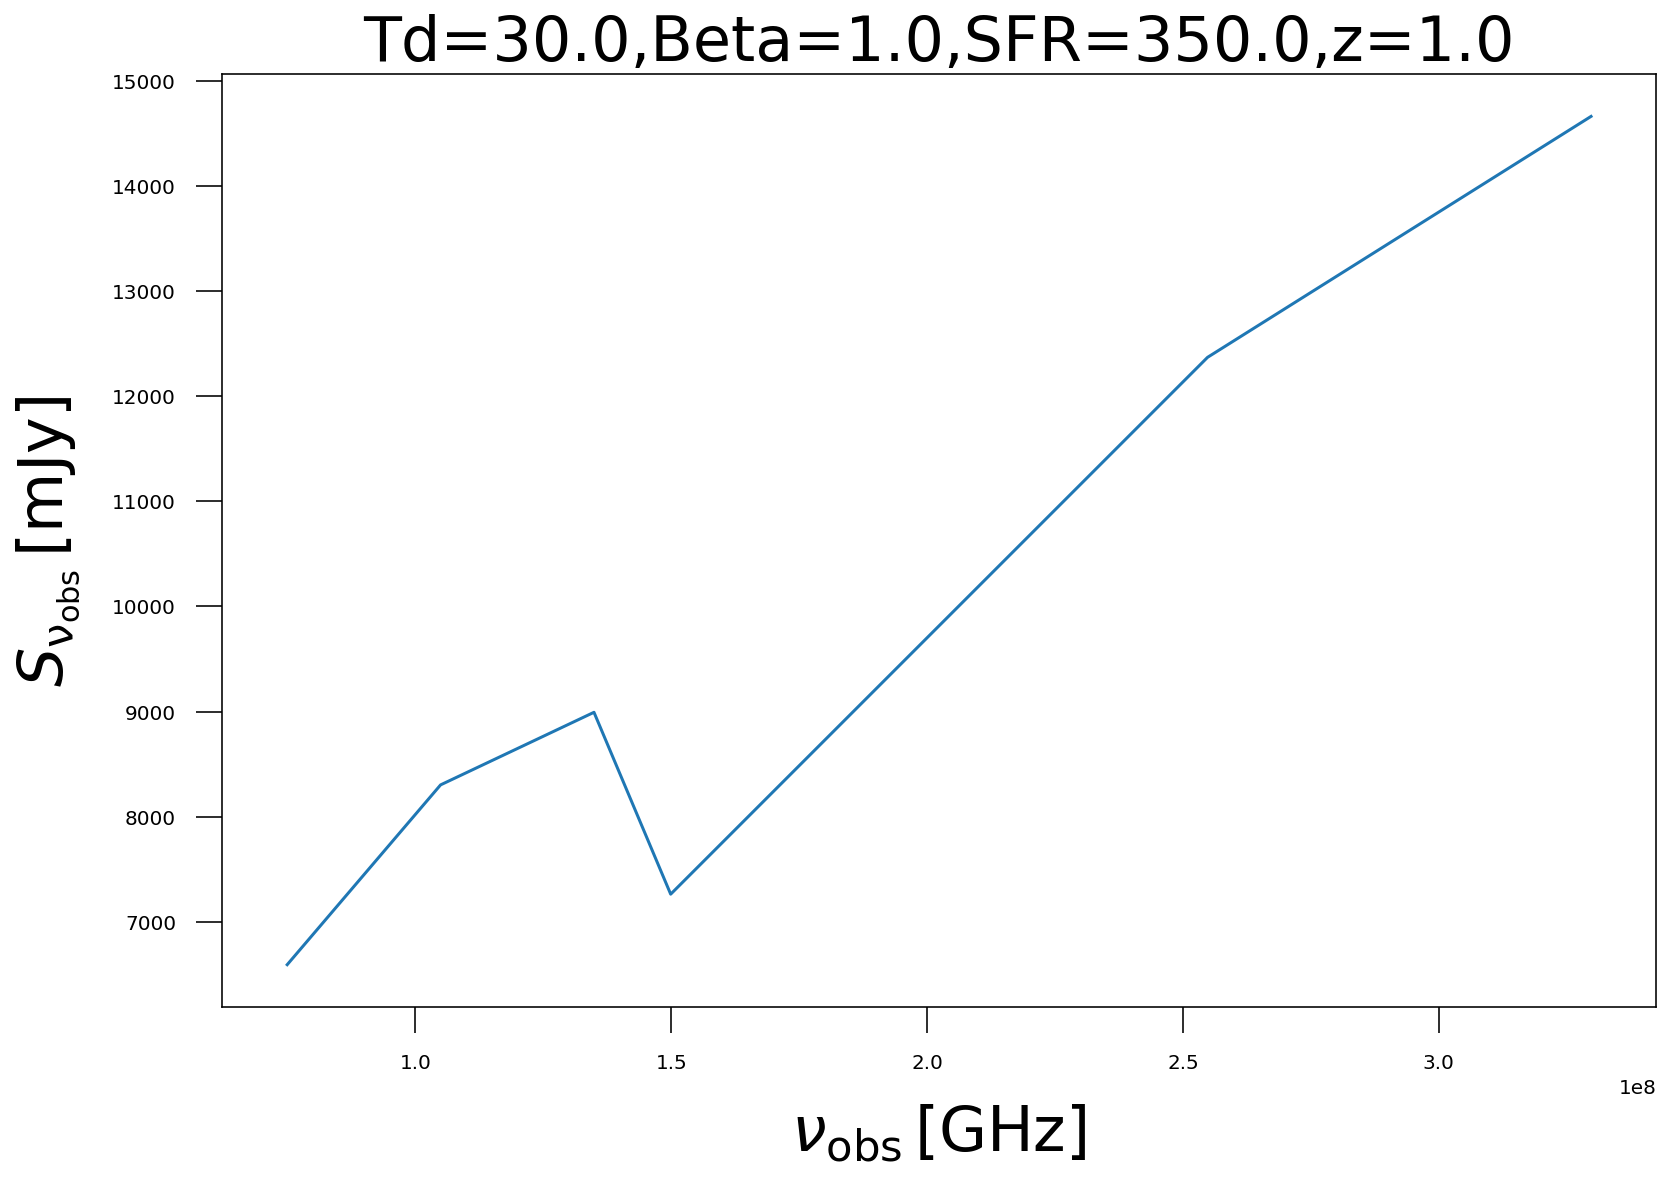

In [133]:
fig = plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=1)
plt.subplots_adjust(left=0.15, right=0.98, top=0.98, bottom=0.17)
fig.set_size_inches(12, 8)

axes.tick_params(which='minor', length=8)
axes.tick_params(which='major', length=13)
axes.tick_params(axis='x', pad=10)
axes.tick_params(axis='y', pad=10)

#axes.set_xlim(0.5, 5.0E3)
#axes.set_ylim(6.E-1,50.)
#plt.xscale("log")
#plt.yscale("log")
axes.set_xlabel(r'$\nu_{\rm obs}\,{\rm [GHz]}$', fontsize=31, labelpad=15)
axes.set_ylabel(r'$S_{\rm \nu_{\rm obs}}\,{\rm [mJy]}$', fontsize=31, labelpad=15)

#plt.errorbar(data[:,0]*299792.458,data[:,1],data[:,2])
plt.plot(data[:,0]*299792.458,data[:,1])
plt.title(save_name[0],fontsize=31)

1mm rms:  2071191.676378814
1mm rms:  2395444.8172799894


<Figure size 432x288 with 0 Axes>

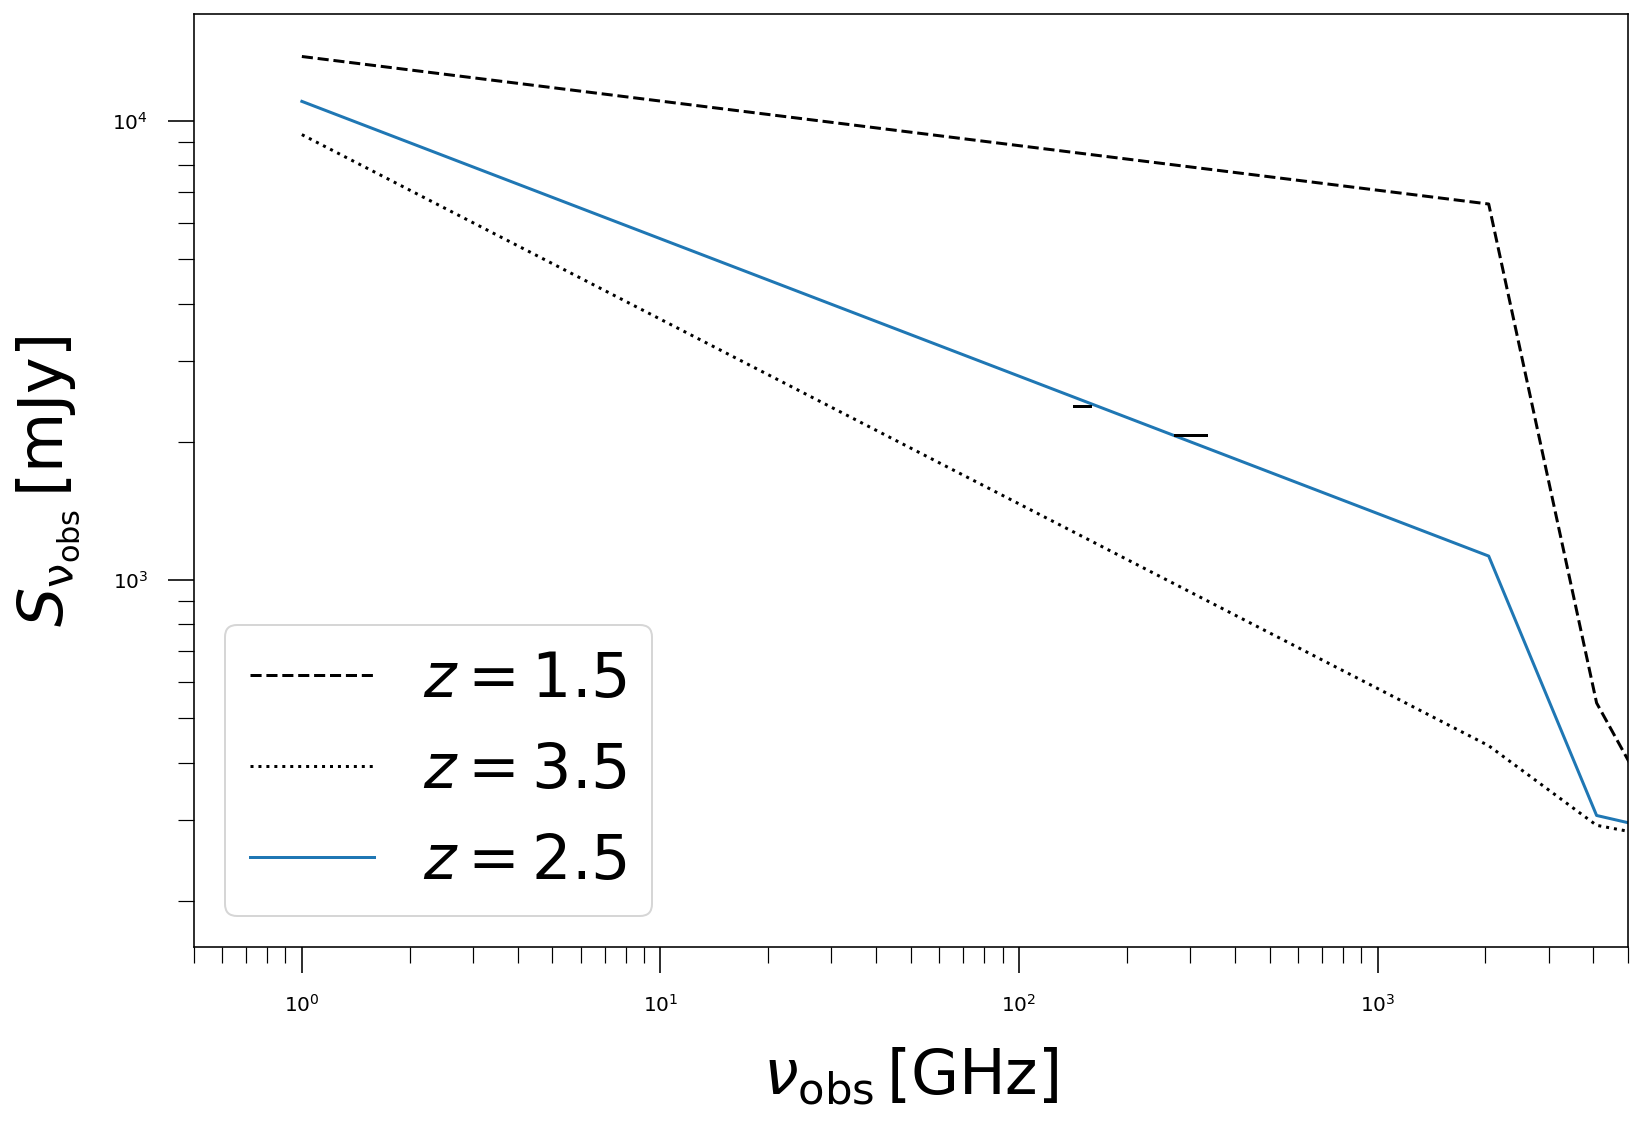

In [24]:
"""Generate and plots SED with 1mm and 850um limits"""



fig = plt.figure()

fig, axes = plt.subplots(nrows=1, ncols=1)

plt.subplots_adjust(left=0.15, right=0.98, top=0.98, bottom=0.17)

fig.set_size_inches(12, 8)



axes.tick_params(which='minor', length=8)

axes.tick_params(which='major', length=13)

axes.tick_params(axis='x', pad=10)

axes.tick_params(axis='y', pad=10)



axes.set_xlim(0.5, 5.0E3)

#axes.set_ylim(6.E-1,50.)

plt.xscale("log")

plt.yscale("log")

axes.set_xlabel(r'$\nu_{\rm obs}\,{\rm [GHz]}$', fontsize=31, labelpad=15)

axes.set_ylabel(r'$S_{\rm \nu_{\rm obs}}\,{\rm [mJy]}$', fontsize=31, labelpad=15)











snr = 4.0

l1 = c.value/1000.E-6

l2 = c.value/8.E-6



SFR = 350.



z = 1.5

frq_o, _, _, _, flux = get_mBB_thick_radio(z, SFR)

plt.plot(frq_o, flux*1.E3, "--", color="black", label=r"$z = 1.5$")



z = 3.5

frq_o, _, _, _, flux = get_mBB_thick_radio(z, SFR)

plt.plot(frq_o, flux*1.E3, ":", color="black", label=r"$z = 3.5$")



z = 2.5

frq_o, _, _, _, flux = get_mBB_thick_radio(z, SFR)

plt.plot(frq_o, flux*1.E3, label=r"$z = 2.5$")



flux_1mm = get_flux_from_sed(frq_o, flux, (1.E-9*3.E8/1.E-3)*u.GHz)

print("1mm rms: ", flux_1mm*1000.*1000./snr)

flux_2mm = get_flux_from_sed(frq_o, flux, (1.E-9*3.E8/2.E-3)*u.GHz)

print("1mm rms: ", flux_2mm*1000.*1000./snr)



plt.plot([1.E-9*c.value/900.E-6,1.E-9*c.value/1100.E-6],[flux_1mm*1000./snr, flux_1mm*1000./snr], color="black")

plt.plot([1.E-9*c.value/1900.E-6,1.E-9*c.value/2100.E-6],[flux_2mm*1000./snr, flux_2mm*1000./snr], color="black")





plt.legend(fontsize=31)

plt.show()

#plt.savefig(path+'sed_limits.pdf',format='pdf', dpi=400)